In [1]:
import sys
import seaborn as sns
import os
import glob
from matplotlib import pyplot as plt
import numpy as np
import criticality as crfn
import plot as pltfn
plt.style.use('dark_background')
%load_ext autoreload
%autoreload

# Define paths
#---------------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'
Ftm = '/Volumes/Dominic Time Machine/'

# Find nearest neighbours

In [2]:
# Create lists of coord data
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
coordlist = sorted(glob.glob('*E-07*realcoord.npy'))
nnblist = sorted(glob.glob('*E-07*nnb.npy'))
nnblist

['PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_nnb.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ05_run-01_nnb.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_nnb.npy']

In [3]:
#Calculate nearest neighbours for each cell 
#rng = nearest number of cells with which to build neighbour graph from
#dim = define distance of each pixel in x,y,z, cnt = select which % of neighbours to include
#-------------------------------------------------------------------------------------------------
Fnnb = crfn.neighbour(Fdrop, experiment, coordlist, rng = 6000, dim = [.8, .8, 15], cnt = 0.1)

Doing row 0 of 7472 for PTZ-WILDTYPE-07_BLN


KeyboardInterrupt: 

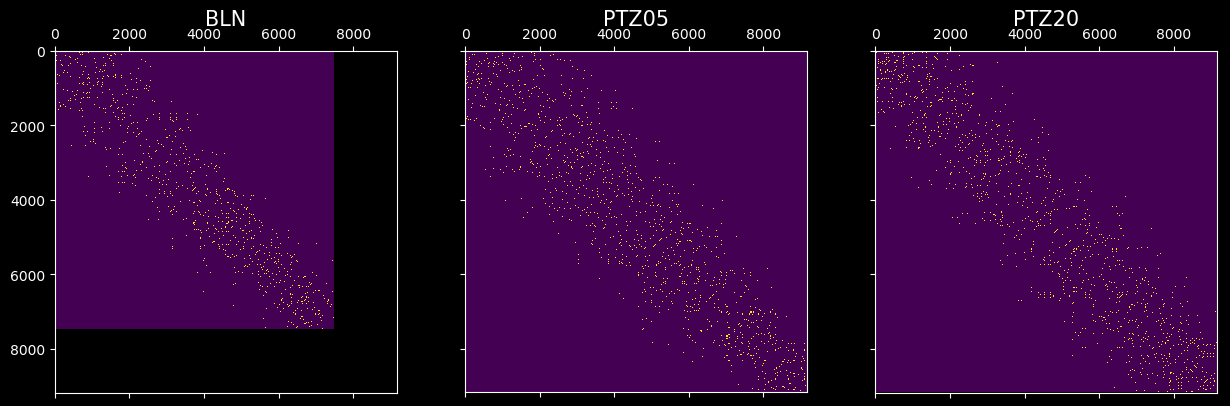

In [80]:
#PLOT - included nearest neighbours
#--------------------------------------------------
pltfn.rasplot(namelist = nnblist)

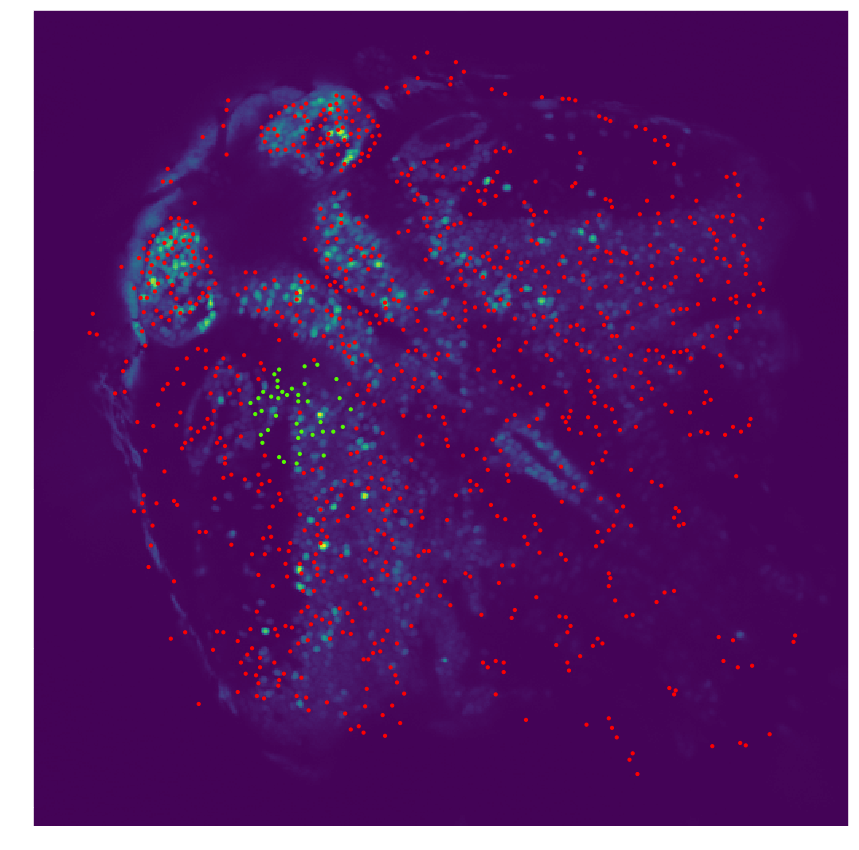

In [5]:
# Plot an illustrative example
#rdshift - right down, rushift - right up
#------------------------------------------------------
plane = 3
cell = 10
experiment = 'PTZ-WILDTYPE'
fnum = '07'
condition = 'BLN'
prefix = '/2photon/sess-01-6dpf/'

Fncellplot = crfn.cellplot(Ftm, Fdrop, experiment, fnum, prefix, condition, plane, cell, xshift = 10, yshift = 15)

# Calculate avalanche statistics

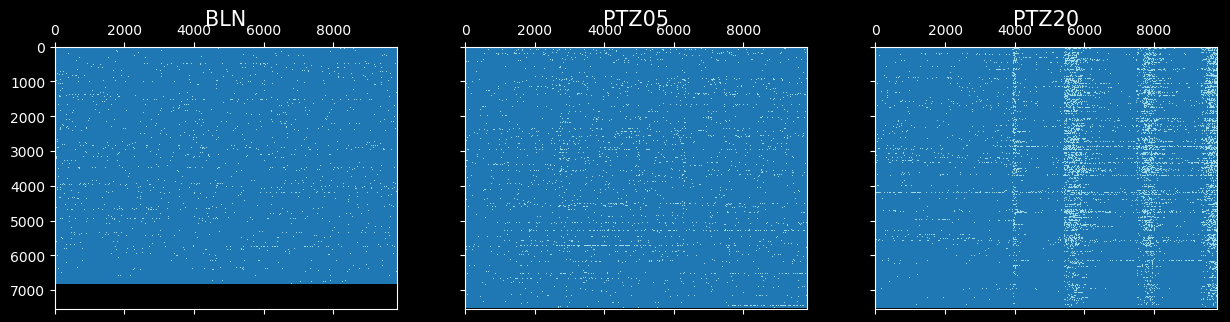

In [245]:
# Create lists of binary data
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
binlist = sorted(glob.glob('*12*binarised.npy'))

# PLOT - detected peaks
#---------------------------------------
pltfn.rasplot(namelist = binlist)

In [6]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
#binlist = sorted(glob.glob('*binarised.npy'))
#nnblist = sorted(glob.glob('*nnb.npy'))
pkglist = sorted(glob.glob('*-02*avdurpkg*'))
branchlist = sorted(glob.glob('*branch*'))
histdurlist = sorted(glob.glob('*avdurhist*'))
histsizelist = sorted(glob.glob('*avsizehist*'))
expdurlist = sorted(glob.glob('*durexponent*'))
Rlist = sorted(glob.glob('*loglik.npy*'))
plist = sorted(glob.glob('*loglikp*'))
pkglist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_avdurpkg.npy',
 'PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ05_run-01_avdurpkg.npy',
 'PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_avdurpkg.npy']

In [138]:
#Select sublists of size/duration - according to 30 minute or 60 minutes
#mode = 'longest' or 'half' 
#-------------------------------------------------------------------------------
sizelist = sorted(glob.glob('*avsizelist*'))
subsizelist = crfn.order(sizelist, n = 11, cond = 3, mode = 'half', block = 'b')
durlist = sorted(glob.glob('*avdurlist*'))
subdurlist = crfn.order(durlist, n = 11, cond = 3, mode = 'half', block = 'b')

In [ ]:
# Avalanche size
#---------------------------------------------------------------------------
Favsizelist, Favsizepkg = crfn.avsize(nnblist, binlist, Fdrop, experiment)

In [ ]:
# Avalanche duration
#---------------------------------------------------------------------------
Favdurlist, Favdurpkg = crfn.avduration(nnblist, binlist, Fdrop, experiment)

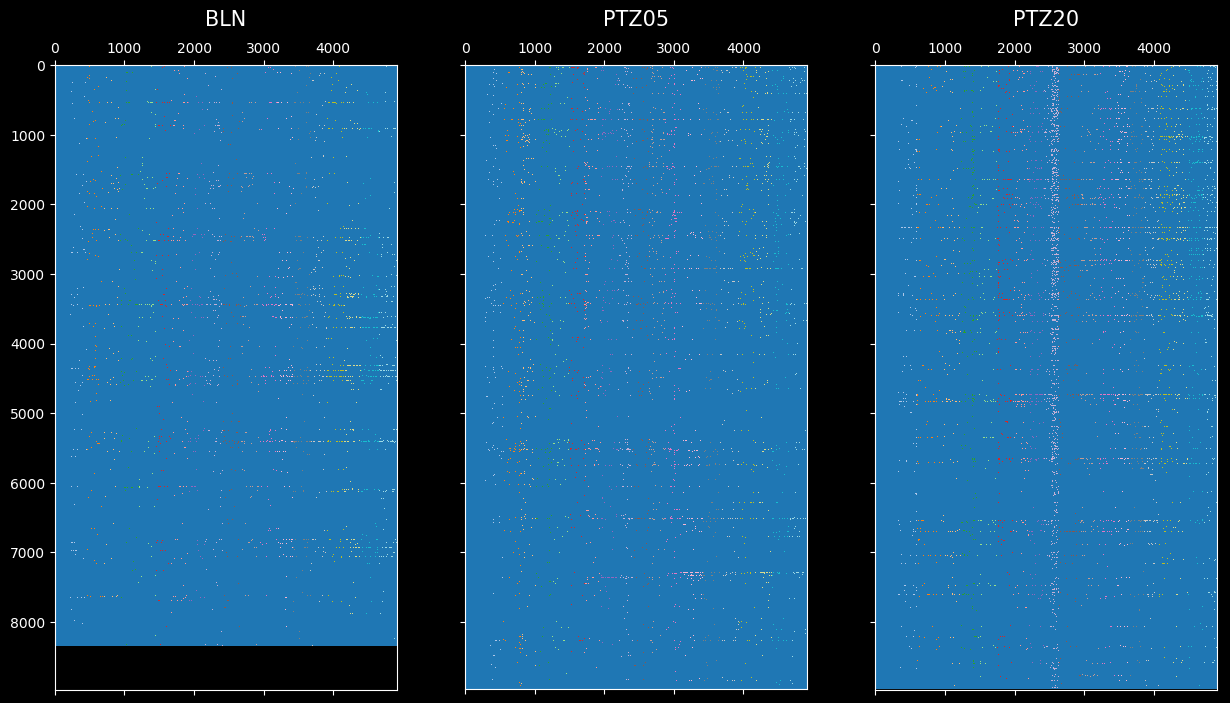

In [244]:
# PLOT - peak groups
#---------------------------------------------------------------------------
pltfn.rasplot(namelist = pkglist)

In [ ]:
#Make histogram
#---------------------------------------------------------------------------
Fhist = crfn.hist(Fdrop, experiment, sublist = binlist, mode = 'size')

Recalculate branching ratio - closer to 1/deviates from 1 during seizures

Recalculate branching ratio - closer to 1/deviates from 1 during seizures
Fit line to straightest bit of the distribution

/Users/dominicburrows/Dropbox/PhD/analysis/py_scripts/suite2p_analysis_py/criticality.py:548: RuntimeWarning: divide by zero encountered in log
  axarr[i].scatter(np.log(np.load(histlist[icounter])[1][:-1]), np.log(np.load(histlist[icounter])[0]), label = 'baseline', s = 8)
/Users/dominicburrows/Dropbox/PhD/analysis/py_scripts/suite2p_analysis_py/criticality.py:549: RuntimeWarning: divide by zero encountered in log
  axarr[i].scatter(np.log(np.load(histlist[icounter+1])[1][:-1]), np.log(np.load(histlist[icounter+1])[0]), label = 'ptz5mm', s=8)
/Users/dominicburrows/Dropbox/PhD/analysis/py_scripts/suite2p_analysis_py/criticality.py:550: RuntimeWarning: divide by zero encountered in log
  axarr[i].scatter(np.log(np.load(histlist[icounter+2])[1][:-1]), np.log(np.load(histlist[icounter+2])[0]), label = 'ptz20mm', s = 8, c = 'r')


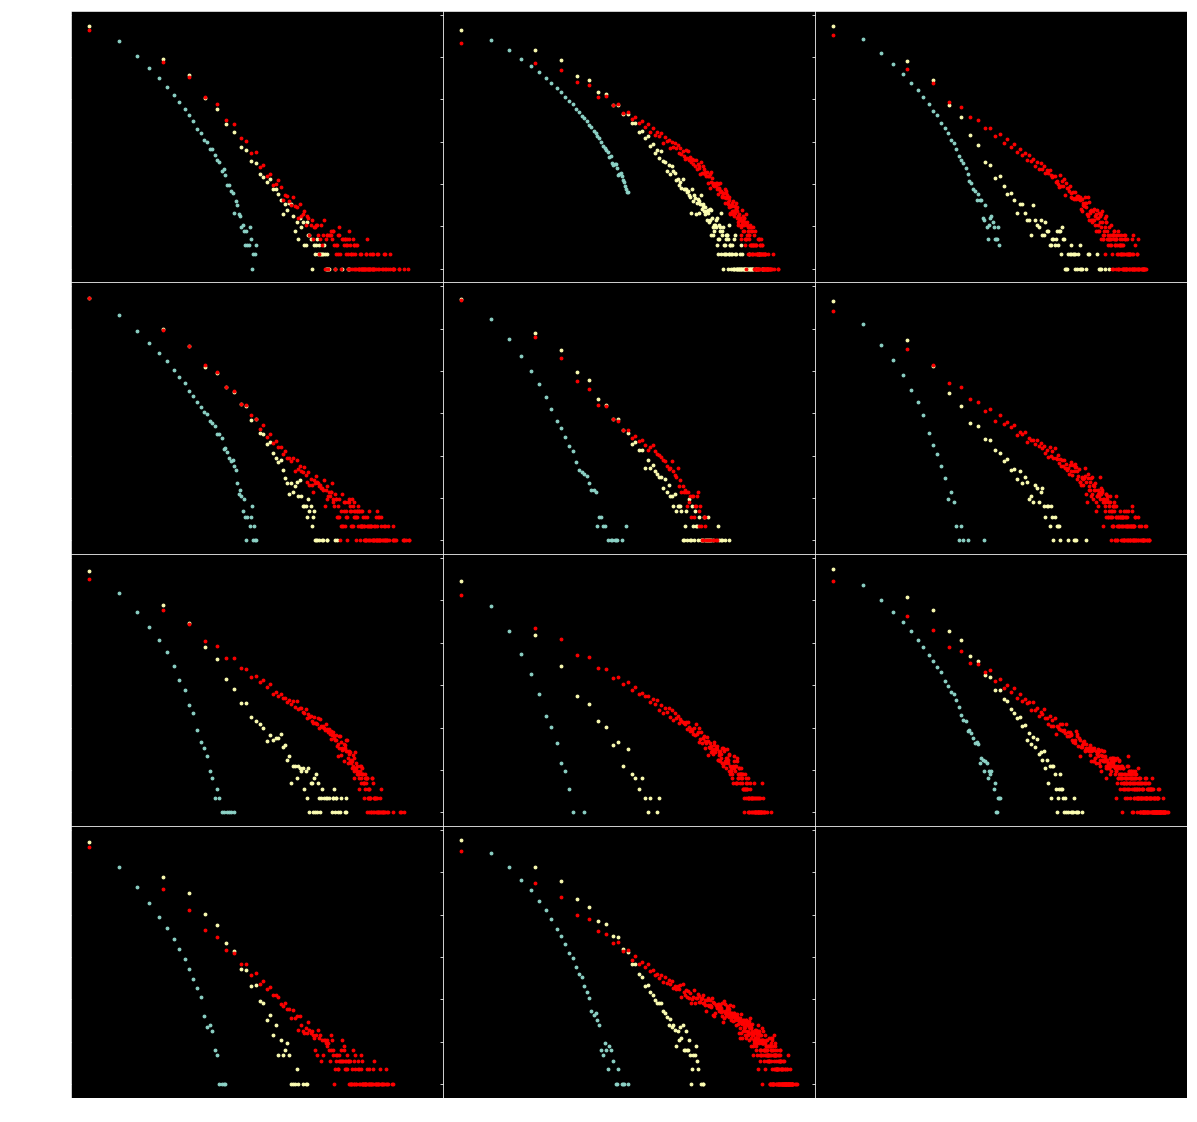

In [7]:
#PLOT - avalanche distribution
#mode = 'size' or 'duration', plot = 'all' or 'single', n = choose which to plot
#------------------------------------------------------------------------------
Favplot = crfn.avplot(histlist = histsizelist, mode = 'size', plot = 'all', n = 0)

In [ ]:
#PLOT - power law fit
#mode - 'fit' = fitted power law to pdf and cdf, 'loglin' = compare log vs linear binning
#----------------------------------------------------------------------------------------
powerfit(Fdrop, experiment, distlist = praclist, mode = 'fit')

In [ ]:
#Critical exponent
#---------------------------------------------------------------------------
Fexp = crfn.exp(Fdrop, experiment, histlist = histdurlist, mode = 'dur')

In [ ]:
#Branching ratio 
#---------------------------------------------------------------------------
Fbranch = crfn.branch(pkglist, subdurlist, Fdrop, experiment)

In [ ]:
#Loglikelihood ratios - comparison of power law fit, to fit to other distributions
#R = loglikelihood ratio between 2 candidate distributions - positive = first distribution, negative = second distribution
#p = significance value for ratio
#normalised ratio - normalises R by its SD - used to calculate p
#distribution - 'power_law', 'truncated_power_law', 'lognormal', 'exponential'
#-------------------------------------------------------------------------------------------------------------------
Fr, Fp = crfn.loglik(Fdrop, experiment, distlist = subsizelist, dist1 = 'truncated_power_law', dist2 = 'lognormal', normratio = True)

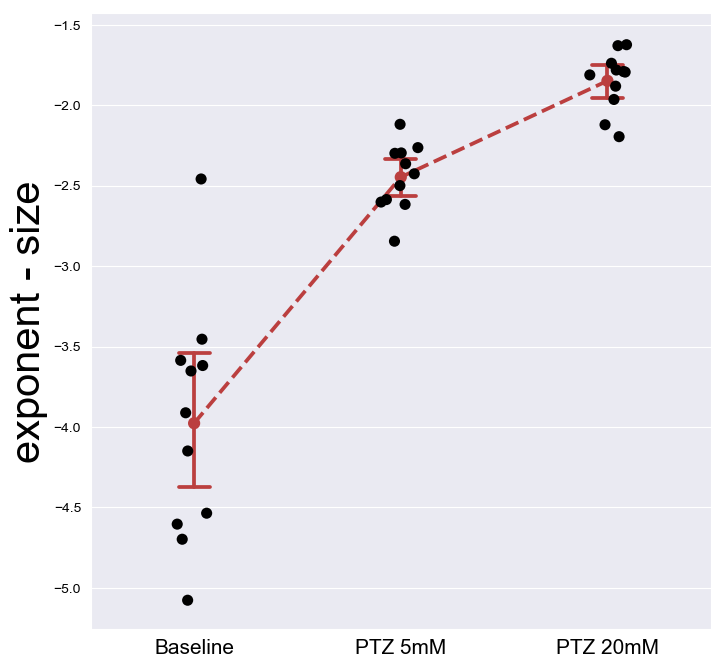

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [77]:
#PLOT - box plot
#-------------------------------
Fboxplot = pltfn.boxplot(Fdrop, experiment, plotlist = expsizelist, title = 'exponent - size')

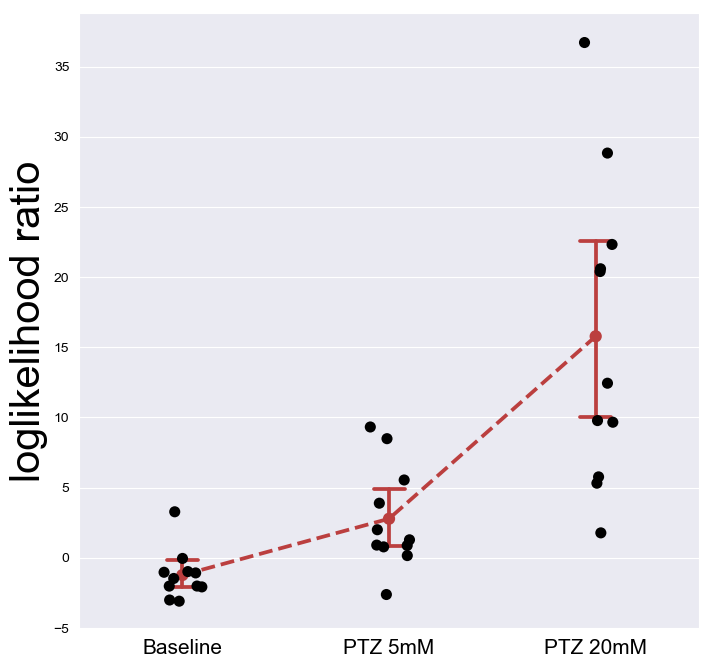

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [132]:
#PLOT - box plot
#-------------------------------
Fboxplot = pltfn.boxplot(Fdrop, experiment, plotlist = Rlist, title = 'loglikelihood ratio')

/Users/dominicburrows/Dropbox/PhD/analysis/py_scripts/criticality.py:586: RuntimeWarning: divide by zero encountered in log
  axarr[i].scatter(np.log(xlist), np.log(np.load(histlist[icounter+2]))/np.log(np.sum(np.load(histlist[icounter+2]))), label = 'ptz20mm', s = 15, c = 'r')
/Users/dominicburrows/Dropbox/PhD/analysis/py_scripts/criticality.py:587: RuntimeWarning: divide by zero encountered in log
  axarr[i].legend(loc='upper left')
/Users/dominicburrows/Dropbox/PhD/analysis/py_scripts/criticality.py:588: RuntimeWarning: divide by zero encountered in log
  icounter = icounter + 3


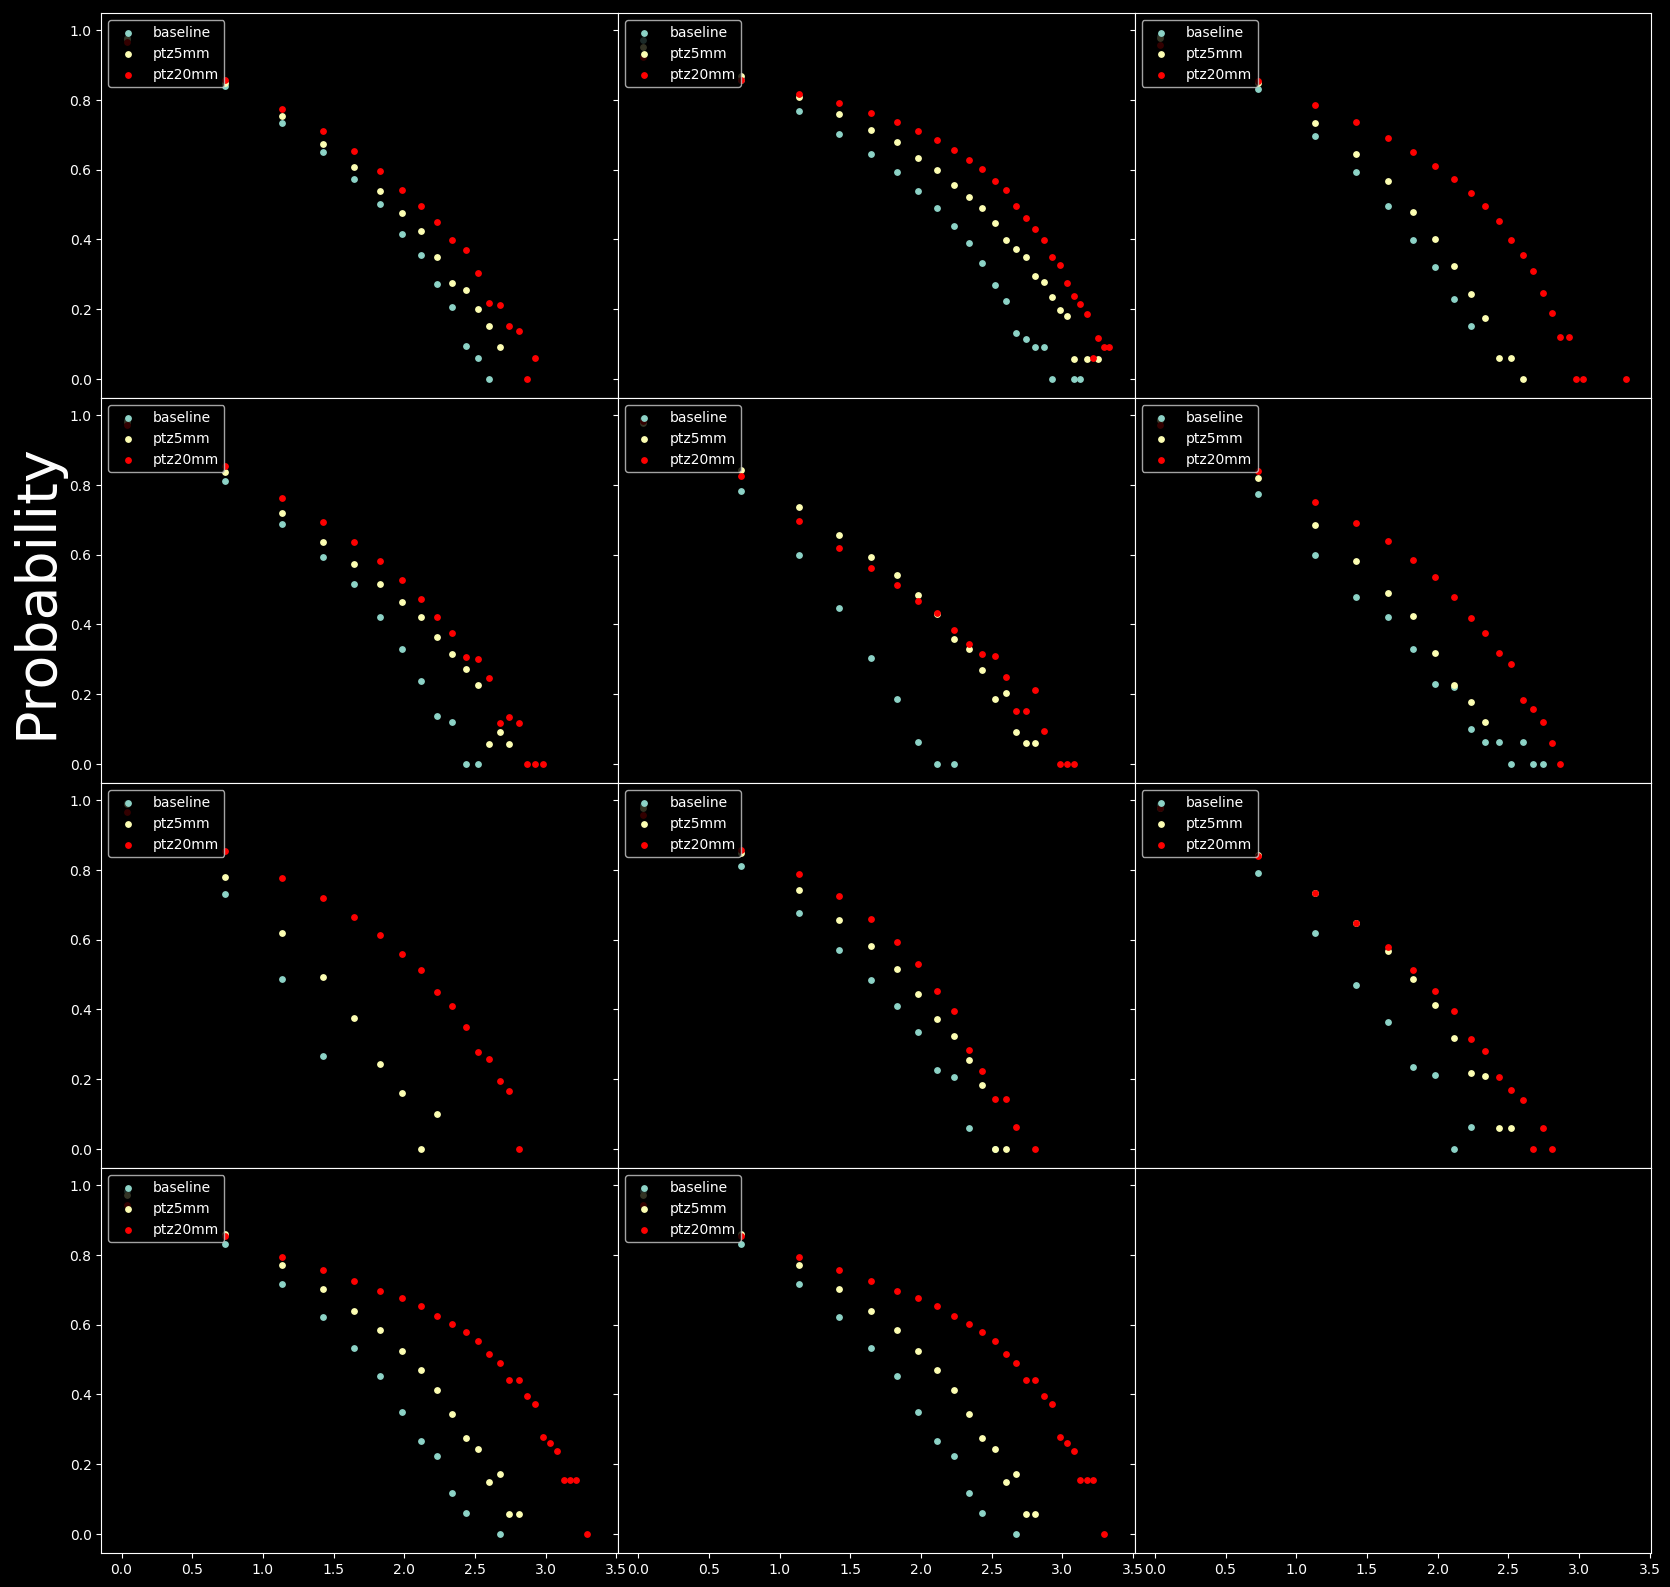

In [133]:
#PLOT - avalanche distribution
#mode = 'size' or 'duration', plot = 'all' or 'single', n = choose which to plot
#------------------------------------------------------------------------------
Favplot = crfn.avplot(histlist = histdurlist, mode = 'dur', plot = 'all', n = 0)

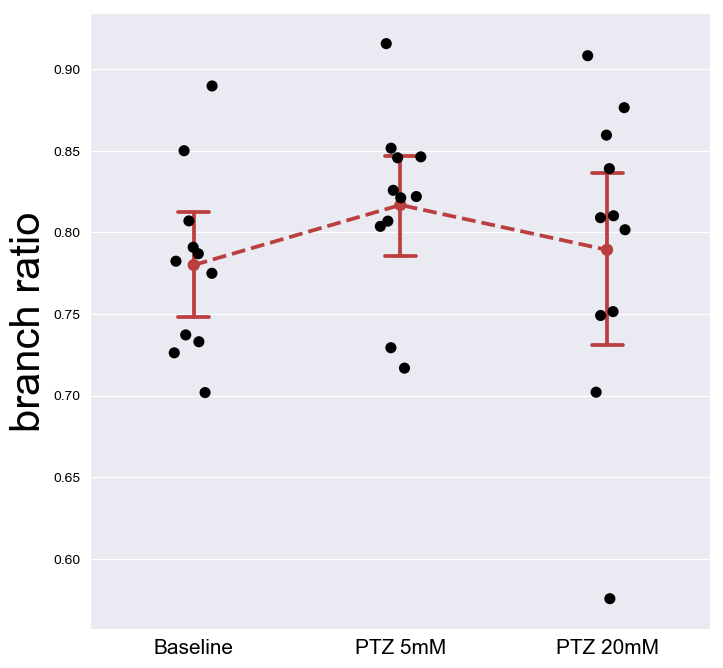

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [134]:
#PLOT - box plot
#-------------------------------
Fboxplot = pltfn.boxplot(Fdrop, experiment, plotlist = branchlist, title = 'branch ratio')

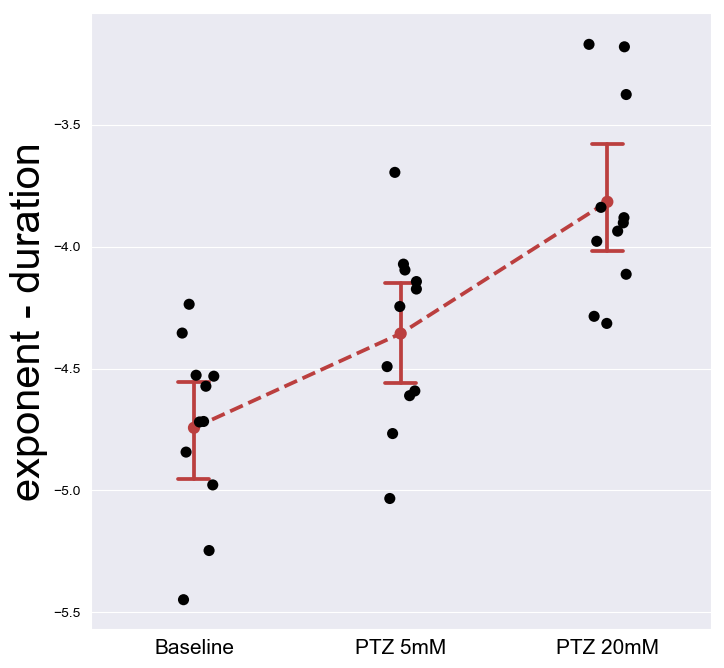

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [136]:
#PLOT - box plot
#-------------------------------
Fboxplot = pltfn.boxplot(Fdrop, experiment, plotlist = expdurlist, title = 'exponent - duration')

In [145]:
Rlist = sorted(glob.glob('*loglik.npy*'))
plist = sorted(glob.glob('*loglikp*'))

In [ ]:
#Loglikelihood ratios - comparison of power law fit, to fit to other distributions
#R = loglikelihood ratio between 2 candidate distributions - positive = first distribution, negative = second distribution
#p = significance value for ratio
#normalised ratio - normalises R by its SD - used to calculate p
#distribution - 'power_law', 'truncated_power_law', 'lognormal', 'exponential'
#-------------------------------------------------------------------------------------------------------------------
Fr, Fp = crfn.loglik(Fdrop, experiment, distlist = subdurlist, dist1 = 'power_law', dist2 = 'lognormal', normratio = True)

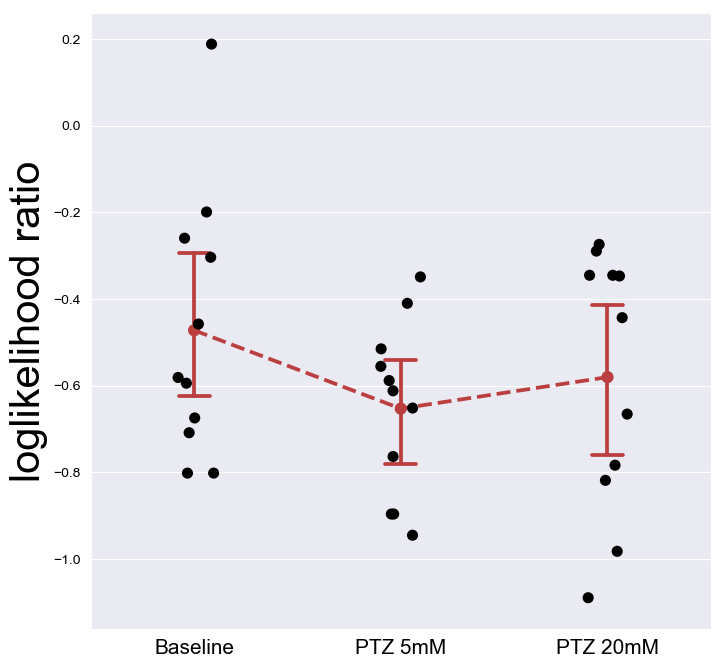

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [146]:
#PLOT - box plot
#-------------------------------
Fboxplot = pltfn.boxplot(Fdrop, experiment, plotlist = Rlist, title = 'loglikelihood ratio')

# Criticality models

In [264]:
?Kuramoto

Init signature: Kuramoto(init_values, noise=None)
Docstring:     
Implementation of Kuramoto coupling model [1] with harmonic terms
and possible perturbation.
It uses NumPy and Scipy's implementation of Runge-Kutta 4(5)
for numerical integration.
Usage example:
>>> kuramoto = Kuramoto(initial_values)
>>> phase = kuramoto.solve(X)
[1] Kuramoto, Y. (1984). Chemical Oscillations, Waves, and Turbulence
    (Vol. 19). doi: doi.org/10.1007/978-3-642-69689-3
Init docstring:
Passed arguments should be a dictionary with NumPy arrays
for initial phase (Y0), intrisic frequencies (W) and coupling
matrix (K).
File:           ~/Dropbox/PhD/analysis/py_scripts/kuramoto.py
Type:           type
Subclasses:     


<Figure size 640x480 with 0 Axes>

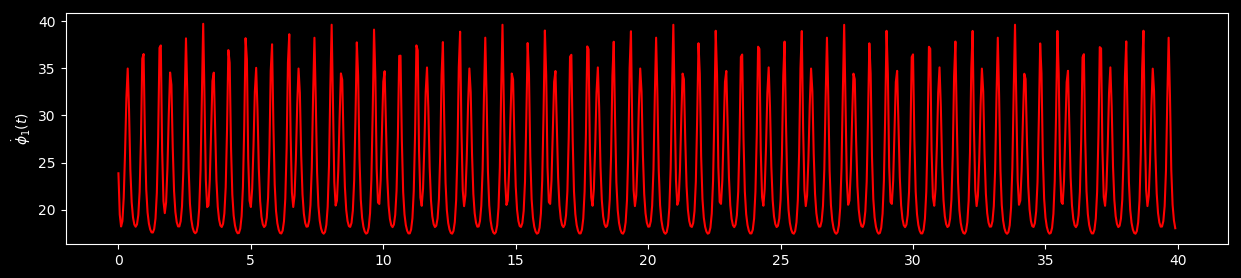

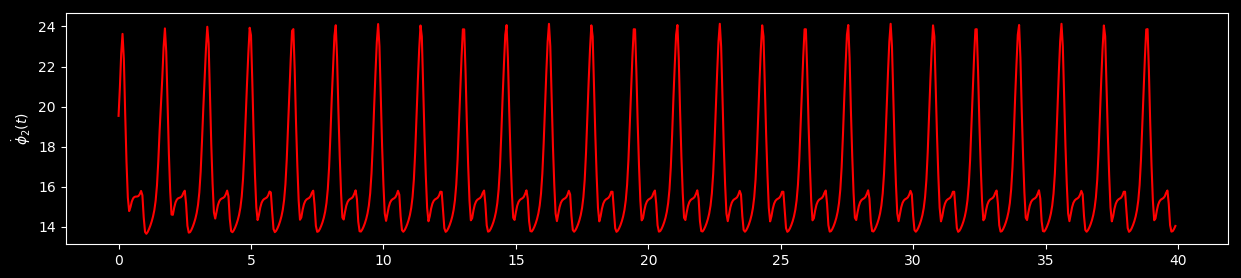

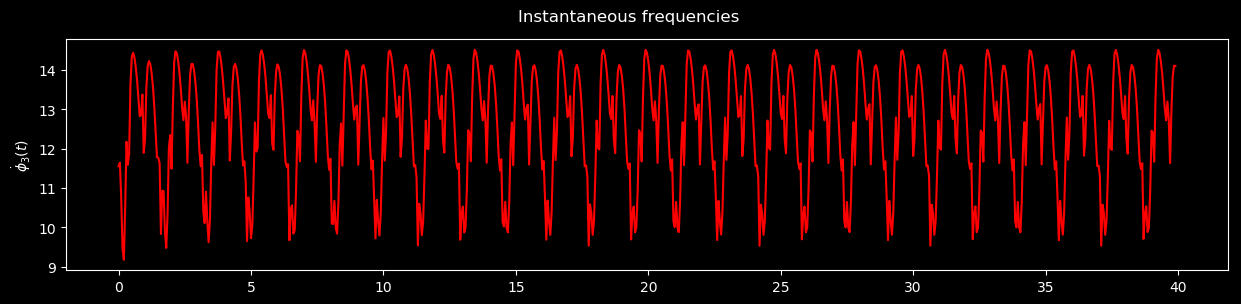

In [341]:
import numpy as np
import pylab as plt
from kuramoto import Kuramoto
 
#Passed arguments - dictionary with np arrays for:
#Y0 = initial phase
#W = intrinsic frequencies
#K = coupling matrix
_Y0 = np.array([0, np.pi,0,1, 5, 2, 3])
_W = np.array([28,19,11,9, 2, 4])
_K = np.array([[ 2.3844,  1.2934,  0.6834,  2.0099,  1.9885],
                   [ -2.3854,  3.6510,  2.0467,  3.6252,  3.2463],
                   [ 10.1939,  4.4156,  1.1423,  0.2509,  4.1527],
                   [ 3.8386,  2.8487,  3.4895,  0.0683,  0.8246],
                   [ 3.9127,  1.2861,  2.9401,  0.1530,  0.6573]])
_K2 = np.array([[ 0.2628,  0.0043,  0.9399,  0.5107,  0.9857],
                   [ 0.8667,  0.8154,  0.4592,  0.9781,  0.0763],
                   [ 0.3723,  0.3856,  0.8374,  0.8812,  0.9419],
                   [ 0.1869,  0.2678,  0.9704,  0.2823,  0.3404],
                   [ 0.1456,  0.7341,  0.1389,  0.5602,  0.3823]])

_K = np.dstack((_K, _K2)).T

# Defining time array
t0, t1, dt = 0, 40, 0.05
T = np.arange(t0, t1, dt)
 
# Preparing oscillators with Kuramoto model
oscN = 3 # num of oscillators

Y0 = _Y0[:oscN]
W = _W[:oscN]
K = _K[:,:oscN,:oscN]

    
#Passing parameters as a dictionary
init_params = {'W':W, 'K':K, 'Y0':Y0}
 
# Running Kuramoto model
kuramoto = Kuramoto(init_params) #create new Kuramoto class with your parameters
kuramoto.noise = 'logistic'
odePhi = kuramoto.solve(T)       #solve method (function of Kuramoto class) for your object, based on time array T
odeT = T[:-1]
 
# Plot the phases
plt.figure()

for comp in range(len(W)):
    #plt.figure(figsize = (8,8))
    plt.subplots(1,1, figsize = (15,3))
    plt.plot(odeT, np.diff(odePhi[comp])/dt,'r')
    plt.ylabel('$\dot\phi_%i(t)$'%(comp+1))

plt.suptitle("Instantaneous frequencies")
plt.savefig('phases')
plt.show()
    
# Computing phase dynamics
#phaseDynamics = np.diff(odePhi)/dt
 
# Plotting response
#nOsc = len(W)
#for osc in range(nOsc):
#    plt.subplot(nOsc, 1, 1+osc)
#    plt.plot(T[:-1], phaseDynamics[osc])
#    plt.ylabel("$\dot\phi_{%i}$" %(osc+1))
#plt.show()

In [294]:
phaseDynamics

array([[27.90021337, 27.72159581, 27.58872782, ..., 28.16033048,
        28.36946581, 28.63209616],
       [18.91904167, 18.76280632, 18.61787316, ..., 17.71154466,
        17.52746124, 17.38101353],
       [11.23032681, 11.66611668, 12.05772381, ..., 10.6546414 ,
        10.58696318, 10.51594922]])

In [291]:
T[1]-T[0]

0.01

In [285]:
odePhi

array([[0.00000000e+00, 2.79002134e-01, 5.56218092e-01, ...,
        1.11594910e+03, 1.11623279e+03, 1.11651912e+03],
       [3.14159265e+00, 3.33078307e+00, 3.51841113e+00, ...,
        7.60253641e+02, 7.60428915e+02, 7.60602725e+02],
       [0.00000000e+00, 1.12303268e-01, 2.28964435e-01, ...,
        4.45771806e+02, 4.45877675e+02, 4.45982835e+02]])

In [ ]:
#KURAMOTO OSCILLATORS
#-------------------------------
num_oscillators=15
coupling_strength=0.009

kuramotoDS.pars={'omega':0.1,'K':coupling_strength}

kuramotoDS.varspecs={'x[i]':'for(i,0,'+str(num_oscillators-2)+',omega+K*sum(j,0,'+str(num_oscillators-2)+',sin(x[j]-x[i])))', 'x'+str(num_oscillators-1):'omega+K*sum(i,0,'+str(num_oscillators-1)+',sin(x[i]-x'+str(num_oscillators-1)+'))'}

kuramotoDS.tdata=[0,50*np.pi]
kuramotoDS.ics={}
varnamedict=[]

# This loop assigns random initial phases on the interval [0,2*pi]
for i in range(0,num_oscillators):
    varname=str('x'+str(i))
    varnamedict.append(varname)
    kuramotoDS.ics[varname]=random.uniform(0,2*np.pi)

kuramotoDS.name='KuramotoOscillator'

Kuramoto=Generator.Vode_ODEsystem(kuramotoDS)
traj=Kuramoto.compute('test')
pts=traj.sample(dt=1)
f,ax=plt.subplots(figsize=(6,6),dpi=100)
ax.set_xlim([-1.1,1.1])
ax.set_ylim([-1.1,1.1])
line,=ax.plot([],[],'o')

Ox=[[]]
Oy=[[]]
time=list(pts['t'])
for i in range(0,len(time)):
    x_summ=[]
    y_summ=[]
    for name in varnamedict:
        x_summ.append(np.cos(pts[name][i]))
        y_summ.append(np.sin(pts[name][i]))
    Oy.append(y_summ)
    Ox.append(x_summ)  
def animate(i):
    line.set_xdata(Ox[i][:])
    line.set_ydata(Oy[i][:])
    return line,
#def init(i):
#    line.set_data([],[])
#    return line,
ani1 = animation.FuncAnimation(f, animate, frames=np.arange(0,len(time)),interval=30)#,blit=True)
theta=np.arange(0,2.1*(np.pi),0.1)
plt.plot(np.cos(theta),np.sin(theta),'k', linestyle='dashed')
#ani1.save('./kuramoto_N15_K009.png',writer='imagemagick')
plt.show()\



# Avalanche dynamics

In [ ]:
fli = ['190409_wtp_F1_bln']
critlist = list()
for i in range(len(fli)):
    critlist.append(fli[i])


Fishnnb = np.load(Fdrop  +'/Project/PTZ/nnb/190409_wtp_F1_bln.npy')
Fishcoord = np.load(Fdrop + '/Project/PTZ/filtered/flt_190409_wtp_F1_bln/190409_wtp_F1_bln_all_cord.npy')
Fishbat = np.load(Fdrop  +'/Project/PTZ/filtered/flt_190409_wtp_F1_bln/190409_wtp_F1_bln_all_bin.npy')
Fishpkgsize = np.load(Fdrop  +'/Project/PTZ/criticality/pkg_size/190409_wtp_F1_bln.npy')
Fishpkgdur = np.load(Fdrop  +'/Project/PTZ/criticality/pkg_dur/190409_wtp_F1_bln.npy')

In [ ]:
#HOW MUCH DOES EACH CELL PARTICIPATE IN AVALANCHES
#---------------------------------------------------------
avf = np.zeros(Fishpkgsize[:,0].shape[0]) 

for i in range(Fishpkgsize[:,0].shape[0]):
    avf[i] = np.sum(Fishpkgsize[i,:]>1)/Fishpkgsize[0,:].shape[0]


In [ ]:
#AVALANCE FREQUENCY - BLN
fig, ax = plt.subplots(figsize= (18,18))
dotplot = plt.scatter(Fishcoord[:,0], Fishcoord[:,1], s=40, cmap = 'Spectral_r', c = avf, alpha = 0.7)
fig.colorbar(dotplot, ax = None)
fig.gca().set_aspect('equal', adjustable='box')
plt.clim(np.min(avf20z), 0.1)

os.chdir(Ffig)
plt.savefig('avfreqbln.png')

plt.show()

In [ ]:
Fishnnb5z = np.load(Fdrop  +'/Project/PTZ/nnb/190409_wtp_F1_p05.npy')
Fishcoord5z = np.load(Fdrop + '/Project/PTZ/filtered/flt_190409_wtp_F1_p05/190409_wtp_F1_p05_all_cord.npy')
Fishbat5z = np.load(Fdrop  +'/Project/PTZ/filtered/flt_190409_wtp_F1_p05/190409_wtp_F1_p05_all_bin.npy')
Fishpkgsize5z = np.load(Fdrop  +'/Project/PTZ/criticality/pkg_size/190409_wtp_F1_p05.npy')
Fishpkgdur5z = np.load(Fdrop  +'/Project/PTZ/criticality/pkg_dur/190409_wtp_F1_p05.npy')

In [ ]:
#HOW MUCH DOES EACH CELL PARTICIPATE IN AVALANCHES
#---------------------------------------------------------
avf5z = np.zeros(Fishpkgsize5z[:,0].shape[0]) 

for i in range(Fishpkgsize5z[:,0].shape[0]):
    avf5z[i] = np.sum(Fishpkgsize5z[i,:]>1)/Fishpkgsize5z[0,:].shape[0]

In [ ]:
#AVALANCE FREQUENCY - PTZ5

fig, ax = plt.subplots(figsize= (18,18))
dotplot = plt.scatter(Fishcoord5z[:,0], Fishcoord5z[:,1], s=40, cmap = 'Spectral_r', c = avf5z, alpha = 0.7)
fig.colorbar(dotplot, ax = None)
fig.gca().set_aspect('equal', adjustable='box')
plt.clim(np.min(avf20z), 0.1)


os.chdir(Ffig)
plt.savefig('avfreqp05.png')
plt.show()

In [ ]:
    #FISH 1

Fishnnbz = np.load(Fdrop  +'/Project/PTZ/nnb/190409_wtp_F1_p20.npy')
Fishcoordz = np.load(Fdrop + '/Project/PTZ/filtered/flt_190409_wtp_F1_p20/190409_wtp_F1_p20_all_cord.npy')
Fishbatz = np.load(Fdrop  +'/Project/PTZ/filtered/flt_190409_wtp_F1_p20/190409_wtp_F1_p20_all_bin.npy')
Fishpkgsizez = np.load(Fdrop  +'/Project/PTZ/criticality/pkg_size/190409_wtp_F1_p20.npy')
Fishpkgdurz = np.load(Fdrop  +'/Project/PTZ/criticality/pkg_dur/190409_wtp_F1_p20.npy')

In [ ]:
#HOW MUCH DOES EACH CELL PARTICIPATE IN AVALANCHES
#---------------------------------------------------------
avf20z = np.zeros(Fishpkgsizez[:,0].shape[0]) 

for i in range(Fishpkgsizez[:,0].shape[0]):
    avf20z[i] = np.sum(Fishpkgsizez[i,:]>1)/Fishpkgsizez[0,:].shape[0]

In [ ]:
#AVALANCE FREQUENCY - PTZ20
fig, ax = plt.subplots(figsize= (18,18))
dotplot = plt.scatter(Fishcoordz[:,0], Fishcoordz[:,1], s=40, cmap = 'Spectral_r', c = avf20z, alpha = 0.7)
fig.colorbar(dotplot, ax = None)
fig.gca().set_aspect('equal', adjustable='box')
plt.clim(np.min(avf20z), 0.1)


os.chdir(Ffig)
plt.savefig('avfreqp20.png')

plt.show()

In [ ]:
#ABSOLUTE NUMBER OF AVALANCHE EVENTS
np.sum(ahlist[21][0])

In [ ]:
#ABSOLUTE NUMBER OF AVALANCHE EVENTS
np.sum(ahlist[22][0])

In [ ]:
#ABSOLUTE NUMBER OF AVALANCHE EVENTS
np.sum(ahlist[23][0])

In [ ]:
#PROBABILITY OF EACH CELL PARTICIPATING IN AVALANCHE EVENT
#---------------------------------------------------------
avp = np.zeros(Fishpkgsize5z[:,0].shape[0]) 

for i in range(Fishpkgsize5z[:,0].shape[0]):
    avp[i] = np.sum(Fishpkgsize5z[i,:]>1)/np.sum(ahlist[21][0])


In [ ]:
#AVALANCE PROBABILITY - BLN
fig, ax = plt.subplots(figsize= (18,18))
dotplot = plt.scatter(Fishcoord[:,0], Fishcoord[:,1], s=40, cmap = 'Spectral_r', c = avp, alpha = 0.7)
fig.colorbar(dotplot, ax = None)
fig.gca().set_aspect('equal', adjustable='box')
plt.clim(np.min(avp), 0.0150)
os.chdir(Ffig)
plt.savefig('avprobbln.png')

plt.show()

In [ ]:
np.where(avp > 0.01)[0].shape

In [ ]:
np.where(avp5z > 0.01)[0].shape

In [ ]:
np.where(avp20z > 0.01)[0].shape

In [ ]:
np.max(avp20z)

In [ ]:
#PROBABILITY OF EACH CELL PARTICIPATING IN AVALANCHE EVENT
#---------------------------------------------------------
avp5z = np.zeros(Fishpkgsize5z[:,0].shape[0]) 

for i in range(Fishpkgsize5z[:,0].shape[0]):
    avp5z[i] = np.sum(Fishpkgsize5z[i,:]>1)/np.sum(ahlist[22][0])

In [ ]:
#AVALANCE PROBABILITY - PTZ5
fig, ax = plt.subplots(figsize= (18,18))
dotplot = plt.scatter(Fishcoord5z[:,0], Fishcoord5z[:,1], s=40, cmap = 'Spectral_r', c = avp5z, alpha = 0.7)
fig.colorbar(dotplot, ax = None)
fig.gca().set_aspect('equal', adjustable='box')
plt.clim(np.min(avp), 0.0150)
os.chdir(Ffig)
plt.savefig('avprobp05.png')

plt.show()

In [ ]:
#PROBABILITY OF EACH CELL PARTICIPATING IN AVALANCHE EVENT
#---------------------------------------------------------
avp20z = np.zeros(Fishpkgsizez[:,0].shape[0]) 

for i in range(Fishpkgsizez[:,0].shape[0]):
    avp20z[i] = np.sum(Fishpkgsizez[i,:]>1)/np.sum(ahlist[23][0])

In [ ]:
#AVALANCE PROBABILITY - PTZ20
fig, ax = plt.subplots(figsize= (18,18))
dotplot = plt.scatter(Fishcoordz[:,0], Fishcoordz[:,1], s=40, cmap = 'Spectral_r', c = avp20z, alpha = 0.7)
fig.colorbar(dotplot, ax = None)
fig.gca().set_aspect('equal', adjustable='box')
plt.clim(np.min(avp), 0.015)

os.chdir(Ffig)
plt.savefig('avprobptz20.png')

plt.show()


In [ ]:
fig, ax = plt.subplots(figsize = (12,12))
choose = 21

plt.scatter(np.log(ahlist[choose][1][:-1]), np.log(ahlist[choose][0]/(np.sum(ahlist[choose][0]))), label = 'baseline', s = 100)
plt.scatter(np.log(ahlist[choose + 1][1][:-1]), np.log(ahlist[choose + 1][0]/(np.sum(ahlist[choose + 1][0]))), label = 'ptz5mm', s=100)
plt.scatter(np.log(ahlist[choose + 2][1][:-1]), np.log(ahlist[choose + 2][0]/(np.sum(ahlist[choose + 2][0]))), label = 'ptz20mm', s = 100, c = 'r')
plt.plot((np.max(np.log(ahlist[choose][1][:-1])),np.max(np.log(ahlist[choose][1][:-1]))), (-15,5), 'k--', linewidth = 3, )
#ax.legend()
plt.show()

In [ ]:
cutoff = np.int(np.max((ahlist[21][1][:-1])))
cutoff

In [ ]:
#DEFINE CUTOFF AND FIND TIMEPOINT OF AVALANCHES BEYOND CUTOFF
#------------------------------------------------------------
iflong = np.zeros(Fishpkgsizez[:,0].shape[0])

for i in range(Fishpkgsizez[:,0].shape[0]):
    if np.sum(np.unique(Fishpkgsizez[:,i], return_counts = True)[1][1:] > cutoff) > 0:
        iflong[i] = 1
    else: iflong[i] = 0
    


In [ ]:
#identify which cells are involved
#---------------------------------
avtime = np.where(iflong>0)[0]
avcoord = list(range(len(avtime)))
time = 0
counter = 0

for t in avtime:
    time = np.unique(Fishpkgsizez[:,t], return_counts = True)[0][1:][np.where(np.unique(Fishpkgsizez[:,t], return_counts = True)[1][1:] > cutoff)[0]]
    if len(time) == 1:
        avcoord[counter] = np.where(Fishpkgsizez[:,t] == time[0])
        counter+=1
    

In [ ]:
#PLOT AVALANCHEs
#---------------
avnum = 3
fig, ax = plt.subplots(figsize= (18,18))
master = plt.scatter(Fishcoordz[:,0], Fishcoordz[:,1], s=40, c = 'k', alpha = 0.1)
dotplot = plt.scatter(Fishcoordz[avcoord[avnum]][:,0], Fishcoordz[avcoord[avnum]][:,1], s=40, c = 'r', alpha = 1)
fig.gca().set_aspect('equal', adjustable='box')

os.chdir(Ffig)
plt.savefig('av5.png')

In [ ]:
#contribution of individual regions
#----------------------------------
np.load(Fdrop + os.sep + '/Project/PTZ/ptzrealreg.npy').shape

In [ ]:
Fishcoordz.shape

In [ ]:
#kernel density estimate
#---------------

fig, ax = plt.subplots(figsize= (12,12))
dotplot = plt.scatter(Fishcoordz[pracstack][0][:,0], Fishcoordz[pracstack][0][:,1], s=20, c = 'r', alpha = 0.005)
fig.gca().set_aspect('equal', adjustable='box')
plt.show()

In [ ]:
fig, axes = plt.subplots(figsize= (18,18))

x = Fishcoordz[pracstack][0][:,0]
y = Fishcoordz[pracstack][0][:,1]
nbins = 20
axes.set_title('Hexbin')
axes.hexbin(x, y, gridsize=nbins, cmap=plt.cm.magma)

os.chdir(Ffig)
plt.savefig('hexheatmapav.svg', transparent = True)

In [ ]:
data = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 3]], 200)
#x, y = data.T
data.T.shape

In [ ]:
from scipy.stats import kde
trans = Fishcoordz[pracstack][0][:,:2].T
k = kde.gaussian_kde(trans)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

In [ ]:
fig, axes = plt.subplots(figsize= (18,18))

axes.set_title('Calculate Gaussian KDE')
axes.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.BuGn_r)


In [ ]:
fig, axes = plt.subplots(figsize= (18,18))

axes.set_title('2D Density with shading')
axes.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.magma)


os.chdir(Ffig)
plt.savefig('2dkeheatmapav.png')

In [ ]:
pracstack = np.zeros((1,0)).astype(int)

for i in range(len(avcoord)):
    pracstack = np.hstack((avcoord[i], pracstack))
    

In [ ]:
#avalanche extent
#--------------------------


#avalanche size
#--------------------------
sizeav9 = np.zeros(82)

for i in range(82):
    sizeav9[i] = avcoord[i][0].shape[0]

In [ ]:
s1 = pd.Series(sizeav1, name='fish1')
#s2 = pd.Series(sizeav2, name='fish2')
s3 = pd.Series(sizeav3, name='fish3')
s4 = pd.Series(sizeav4, name='fish4')
s5 = pd.Series(sizeav5, name='fish5')
s6 = pd.Series(sizeav6, name='fish6')
#s7 = pd.Series(sizeav7, name='fish7')
s8 = pd.Series(sizeav8, name='fish8')
#s9 = pd.Series(sizeav9, name='fish9')
df = pd.concat([s1,s3, s4, s5, s6,  s8], axis=1)

In [ ]:
#plot av size
#----------------------------

import pandas as pd

ax = df.plot.kde(figsize=(34,16), style = '-', linewidth = 5, legend = False, fontsize = 40, alpha = 0.8)
ax.set_xlabel("Seizure avalanche size [cells]", fontsize = 40)
ax.set_ylabel("Density", fontsize = 40)

os.chdir(Ffig)
plt.tight_layout()
plt.savefig('supravdistribution.png')

In [ ]:
avcoord[130]

In [ ]:
#SPATIAL EXTENT
#------------------
#metrically scaled coordinates

dim = [.8, .8, 15]
coord = Fishcoordz6
mcs  = np.multiply(coord, dim)  


meandistance7 = np.zeros(130)
for i in range(130):
    #calculate mean coords for all avalanche
    distance = np.zeros(mcs[avcoord[i][0]].shape[0])
    meanx = np.mean(mcs[avcoord[i][0]][:,0])
    meany = np.mean(mcs[avcoord[i][0]][:,1])
    meanz = np.mean(mcs[avcoord[i][0]][:,2])
    meancoord = np.hstack((meanx,meany,meanz))
    #find euclidean distance for each coordinate
    #loop through each cell in avalanche|
    for j in range(mcs[avcoord[i][0]].shape[0]):
        distance[j] = np.linalg.norm(meancoord-mcs[avcoord[i][0]][j])
    meandistance7[i] = np.mean(distance)
        

In [ ]:
s1 = pd.Series(meandistance1, name='fish1')
s2 = pd.Series(meandistance2, name='fish2')
s3 = pd.Series(meandistance3, name='fish3')
s4 = pd.Series(meandistance4, name='fish4')
s5 = pd.Series(meandistance5, name='fish5')
s6 = pd.Series(meandistance6, name='fish6')
s7 = pd.Series(meandistance7, name='fish7')
s8 = pd.Series(meandistance8, name='fish8')
s9 = pd.Series(meandistance9, name='fish9')
df = pd.concat([s1, s2, s3, s5, s6, s7, s8, s9], axis=1)

In [ ]:

import pandas as pd

ax = df.plot.kde(figsize=(34,16), style = '-', linewidth = 5, legend = False, fontsize = 40, alpha = 1)
ax.set_xlabel("Seizure avalanche spatial extent ", fontsize = 40)
ax.set_ylabel("Density", fontsize = 40)

os.chdir(Ffig)
plt.tight_layout()
plt.savefig('supravextentdistribution.png')

In [ ]:
#save video
#---------------
avnum = 9

os.chdir(Ffig)

for i in range(50):
    fig, ax = plt.subplots(figsize= (12,12))
    master = plt.scatter(Fishcoordz[:,0], Fishcoordz[:,1], s=20, c = 'k', alpha = 0.1)
    dotplot = plt.scatter(Fishcoordz[avcoord[i]][:,0], Fishcoordz[avcoord[i]][:,1], s=20, c = 'r', alpha = 1)
    fig.gca().set_aspect('equal', adjustable='box')
    plt.savefig('av' + str(i) + '.tiff')


from skimage import io
from PIL import Image

os.chdir(Ffig)
ogli = sorted(glob.glob('*.tiff'))
omlist = []

for i in range(len(ogli)-1):
    readme = io.imread(Ffig + 'av' + str(i) + '.tiff')
    omlist.append(Image.fromarray(readme))
    #omlist.append(Image.fromarray(rotimglist[i]).convert('L'))
    
omlist[0].save(Ffig + "avmovie.tif", save_all=True,
               append_images=omlist[1:])

# RIP ----- Code Graveyard

In [ ]:
# calculates number of cells in each distinct avalanche event (takes ages)
#=======================================================================
def distinctduration(nnblist, binlist): # duration = normal, size = calculate from unique cells in duration
#=======================================================================
    import numpy as np
    
#Calculate avalanche size + duration
#-----------------------------------
    avlist = list(range(len(nnblist)))
    distlist = list(range(len(nnblist)))
    
    for y in range(len(avlist)):
        binarray = np.load(binlist[y])
        nnbarray = np.load(nnblist[y])
        pkg    = np.zeros(binarray.shape) #peak groups by timebin
        i = 0
        marker = 0
        distinctlist = (np.zeros(1)) #list containing updated number of distinct cells per avalanche
        
        for t in range(binarray.shape[1]-1): #loop through all time points
            #if i% round(10*binarray.shape[1]/100) == 0: print('doing time step ' + str(i) + 'of' + str(binarray.shape[1]) + 'for fish ' + str(y))
            #i = i+1
            print('done time point' + ' ' + str(t))
            cid = np.where(binarray[:,t] > 0)[0]  #cid = cells active at current time point
    
    #mark all avalanches in time point with different number
    #-------------------------------------------------------------------------------------
            for c in cid:            #loop through all active cells at this time point
                                     #mark all cells and its neighbours with same value 
                if pkg[c,t] == 0:
                    if len(np.intersect1d(np.where(nnbarray[c,:] > 0)[0], cid) > 2): #if >2 neighbours active
                        marker = marker + 1
                        pkg[c,t] = marker
                        distinctlist = np.hstack((distinctlist, (np.zeros(1)))) #once each marker is created append empty element to distinctlist vector for future addition
                        
        # Find all neighbours
        #-------------------------------------------------------------------
                neighbour = np.where(nnbarray[c,:] > 0)[0]  #return indeces of current cells neighbours
                neighbouron  = np.intersect1d(cid,neighbour)    #indeces of active cells in t, and also neighbours of c
                where0 = np.where(pkg[neighbouron,t] == 0)[0]
                pkg[neighbouron[where0],t] = pkg[c,t]
                
    #mark all continuing avalanche with marker number in next frame
    #-------------------------------------------------------------------------------------
            n_av = np.unique(pkg[:,t])  #returns the marker values for each avalanche at this time point
    
            for n in n_av: #loop through each avalanche in this time point
                if n > 0:                    
                    cgroup = np.where(pkg[:,t] == n)[0] #cells that are in same avalanche at t
                    cid2 = np.where(binarray[:,t+1] > 0) #cells in next time point that are active
                    intersect = np.intersect1d(cgroup, cid2) #check if any of the same cells are active in next time point
                    
                    wherealso0 = np.where(pkg[intersect,t+1] == 0)[0] #here we find all cells that are active in both time frames, and that are not part of an avalanche - and mark them as avalanche
                    pkg[intersect[wherealso0], t+1] = pkg[cgroup[0],t] #carry over value to next frame for those cells
                    
                    #if avalanche ends at this time point then calculate unique cells in this avalanche
                    if np.sum(intersect) == 0:
                        distinctlist[(np.int(n))] = len(np.unique(np.where(pkg == n)[0]))                                     
        avlist[y] = pkg
        distlist[y] = distinctlist
        
    return(avlist, distinctlist)


In [ ]:
#=======================================================================
def test2(nnblist, binlist): # duration = no convergence, cells in t need not be active in t+1, neighbours can be active
#=======================================================================
    import numpy as np
    
#Calculate avalanche size + duration
#-----------------------------------
    avlist = list(range(len(nnblist)))
    
    for y in range(len(avlist)):
        binarray = np.load(binlist[y])
        nnbarray = np.load(nnblist[y])
        pkg    = np.zeros(binarray.shape) #peak groups by timebin
        i = 0
        marker = 0
        
        for t in range(binarray.shape[1]-1): #loop through all time points
            if i% round(10*binarray.shape[1]/100) == 0: print('doing time step ' + str(i) + 'of' + str(binarray.shape[1]) + 'for fish ' + str(y))
            i = i+1
            cid = np.where(binarray[:,t] > 0)[0]  #cid = cells active at current time point
    
    #mark all avalanches in time point with different number
    #-------------------------------------------------------------------------------------
            for c in cid:            #loop through all active cells at this time point
                                     #mark all cells and its neighbours with same value 
                if pkg[c,t] == 0:
                    if len(np.intersect1d(np.where(nnbarray[c,:] > 0)[0], cid) > 2): #if >2 neighbours active
                        marker = marker + 1
                        pkg[c,t] = marker

        
        # Find all neighbours
        #-------------------------------------------------------------------
                neighbour = np.where(nnbarray[c,:] > 0)[0]  #return indeces of current cells neighbours
                neighbouron  = np.intersect1d(cid,neighbour)    #indeces of active cells in t, and also neighbours of c
                where0 = np.where(pkg[neighbouron,t] == 0)[0]
                pkg[neighbouron[where0],t] = pkg[c,t]
                
            
    #mark all continuing avalanche with marker number in next frame
    #-------------------------------------------------------------------------------------
            n_av = np.unique(pkg[:,t])  #returns the marker values for each avalanche at this time point
    
            for n in n_av: #loop through each avalanche in this time point
                if n > 0:
                    cgroup = np.where(pkg[:,t] == n)[0] #cells that are in same avalanche at t
                    cid2 = np.where(binarray[:,t+1] > 0) #cells in next time point that are active
                    intersect = np.intersect1d(cgroup, cid2) #check if any of the same cells are active in next time point
                    wherealso0 = np.where(pkg[intersect,t+1] == 0)[0] #here we find all cells that are active in both time frames, and that are not already part of another avalanche - and mark them as current avalanche
                    
                    neighboursnow = np.where(nnbarray[cgroup,:] > 0)[1]   #all neighbours of currently active cells
                    intersectneighcellt1 = np.intersect1d(neighboursnow,cid2) #cells active in next time point and neighbours of current time frame
                    
                    pkg[intersect[wherealso0], t+1] = pkg[cgroup[0],t] #carry over value to next frame for cells in last time point who are also active in next time point
                    pkg[intersectneighcellt1,t+1] = pkg[cgroup[0],t] #carry over marker value for neighbours of cells active in last time point, who are active in next
          
        avlist[y] = pkg    
    return(avlist)

#=======================================================================
def test3(nnblist, binlist): # duration = yes convergence (no back propagation, earliest avalanche consumes meeting avalanche, and later avalanche terminates), cells in t must be active in t+1)
#=======================================================================
    import numpy as np
    
#Calculate avalanche size + duration
#-----------------------------------
    avlist = list(range(len(nnblist)))
    
    for y in range(len(avlist)):
        binarray = np.load(binlist[y])
        nnbarray = np.load(nnblist[y])
        pkg    = np.zeros(binarray.shape) #peak groups by timebin
        i = 0
        marker = 0
        
        for t in range(binarray.shape[1]-1): #loop through all time points
            if i% round(10*binarray.shape[1]/100) == 0: print('doing time step ' + str(i) + 'of' + str(binarray.shape[1]) + 'for fish ' + str(y))
            i = i+1
            cid = np.where(binarray[:,t] > 0)[0]  #cid = cells active at current time point
    
    #mark all avalanches in time point with different number
    #-------------------------------------------------------------------------------------
            for c in cid:            #loop through all active cells at this time point
                                     #mark all cells and its neighbours with same value 
                if pkg[c,t] == 0:
                    if len(np.intersect1d(np.where(nnbarray[c,:] > 0)[0], cid) > 2): #if >2 neighbours active
                        marker = marker + 1
                        pkg[c,t] = marker
        
        # Find all neighbours
        #-------------------------------------------------------------------
                neighbour = np.where(nnbarray[c,:] > 0)[0]  #return indeces of current cells neighbours
                neighbouron  = np.intersect1d(cid,neighbour) #indeces of active cells in t, and also neighbours of c
                where0 = np.where(pkg[neighbouron,t] == 0)[0]
                wherealreadyav = np.where(pkg[neighbouron,t] > 0)[0] #find all neighbours that are active and already part of another avalanche -
                
                #if neighbours converge across avalanches - make all active cells part of new avalanche
                if len(wherealreadyav) > 0:
                    pkg[neighbouron[where0],t] = pkg[c,t]
                    
                #if neighbours don't converge - mark continuing avalanche neighbours
                else:
                    pkg[neighbouron[where0],t] = pkg[c,t]
                
            
    #mark all continuing avalanche with marker number in next frame
    #-------------------------------------------------------------------------------------
            n_av = np.unique(pkg[:,t])  #returns the marker values for each avalanche at this time point
    
            for n in n_av: #loop through each avalanche in this time point
                if n > 0:
                    cgroup = np.where(pkg[:,t] == n)[0] #cells that are in same avalanche at t
                    cid2 = np.where(binarray[:,t+1] > 0) #cells in next time point that are active
                    intersect = np.intersect1d(cgroup, cid2) #check if any of the same cells are active in next time point
                    
                    wherealso0 = np.where(pkg[intersect,t+1] == 0)[0] #here we find all cells that are active in both time frames, and that are not already part of another avalanche - and mark them as current avalanche
                    
                    pkg[intersect[wherealso0], t+1] = pkg[cgroup[0],t] #carry over value to next frame for those cells
                    

        #avlist[y] = pkg
        
    #return(avlist)



In [ ]:
#calculate avalanche size by finding total number of cells in each avalanche

#absolute values - calculate unique marker values across pkg
#--------------------------------------------------------------

bln = Fcritsizepkg[0]
p5 = Fcritsizepkg[1]
p20 = Fcritsizepkg[2]

totalsizebln = np.unique(bln, return_counts = True)[1][1:]
totalsizep5 = np.unique(p5, return_counts = True)[1][1:]
totalsizep20 = np.unique(p20, return_counts = True)[1][1:]

#absolute values - calculate histogram of number of cells in each unique marker value
#------------------------------------------------------------------------------------
blnavdist = totalsizebln
blnavdistcut  = blnavdist[blnavdist >= 5]
blnbinned = np.linspace(np.min(blnavdistcut), np.max(blnavdistcut), 200)
blnhist = np.histogram(blnavdistcut, bins = blnbinned)

p5avdist = totalsizep5
p5avdistcut  = p5avdist[p5avdist >= 5]
p5binned = np.linspace(np.min(p5avdistcut), np.max(p5avdistcut), 200)
p5hist = np.histogram(p5avdistcut, bins = p5binned)

p20avdist = totalsizep20
p20avdistcut  = p20avdist[p20avdist >= 5]
p20binned = np.linspace(np.min(p20avdistcut), np.max(p20avdistcut), 200)
p20hist = np.histogram(p20avdistcut, bins = p20binned)

In [ ]:
#avalanche distribution plotting regimes
#-----------------------------------------


f, axarr = plt.subplots(3,3,sharey=True, sharex=True, figsize = (20,20))
f.subplots_adjust(hspace=0)
axarr = axarr.flatten()
icounter = 0

plt.subplots_adjust(wspace=0, hspace=0)

for i in range(int(len(critfold)/3)):
    axarr[i].scatter(np.log(ahlist[icounter][1][:-1]), np.log(ahlist[icounter][0])/np.log(np.sum(ahlist[icounter][0])), label = 'baseline', s = 50)
    axarr[i].scatter(np.log(ahlist[icounter+1][1][:-1]), np.log(ahlist[icounter+1][0])/np.log(np.sum(ahlist[icounter+1][0])), label = 'ptz5mm', s=50)
    axarr[i].scatter(np.log(ahlist[icounter+2][1][:-1]), np.log(ahlist[icounter+2][0])/np.log(np.sum(ahlist[icounter+2][0])), label = 'ptz20mm', s = 50, c = 'r')
    #axarr[i].legend(loc='upper left')
    icounter = icounter + 3



axarr[7].set_xlabel('Avalanche size', fontsize = 40)
axarr[3].set_ylabel('Probability', fontsize = 40)

#$10^1$','$10^2$', '$10^3$', '$10^4$', '$10^5$', '$10^6$', '$10^7$', '$10^8$', '$10^9$' ), size = 15, color = 'white')
#plt.yticks(np.arange(15), (

#axarr[8].set_xticklabels([(['1','$\mathregular{10^{-1}}$', '$\mathregular{10^{-0.7}}$', '$\mathregular{10^{-0.4}}$', '$\mathregular{10^{-0.2}}$','$\mathregular{10^{-0.09}}$', '$\mathregular{10^{0}}$'], fontsize = 15) 
#axarr[7].set_xticklabels(['-0.2', '-0.2','0', '0.2', '0.4', '0.6'], fontsize = 15)
axarr[6].set_xticklabels(['$\mathregular{2x10^2}}$', '$\mathregular{10^1}}$','$\mathregular{10^2}}$', '$\mathregular{10^3}}$', '$\mathregular{10^4}}$', '$\mathregular{2x10^2}}$'], fontsize = 15)
axarr[0].set_yticklabels(['1','$\mathregular{10^{-1}}$', '$\mathregular{10^{-0.7}}$', '$\mathregular{10^{-0.4}}$', '$\mathregular{10^{-0.2}}$','$\mathregular{10^{-0.09}}$', '$\mathregular{10^{0}}$'], fontsize = 15)
axarr[3].set_yticklabels(['1','$\mathregular{10^{-1}}$', '$\mathregular{10^{-0.7}}$', '$\mathregular{10^{-0.4}}$', '$\mathregular{10^{-0.2}}$','$\mathregular{10^{-0.09}}$', '$\mathregular{10^{0}}$'], fontsize = 15)
axarr[6].set_yticklabels(['1','$\mathregular{10^{-1}}$', '$\mathregular{10^{-0.7}}$', '$\mathregular{10^{-0.4}}$', '$\mathregular{10^{-0.2}}$','$\mathregular{10^{-0.09}}$', '$\mathregular{10^{0}}$'], fontsize = 15)
axarr[0].locator_params(axis='x', nbins=5)

axarr[0].yaxis.set_tick_params(labelsize = 20)
axarr[8].xaxis.set_tick_params(labelsize=20)
axarr[3].yaxis.set_tick_params(labelsize = 20)
axarr[6].xaxis.set_tick_params(labelsize=20)
axarr[6].yaxis.set_tick_params(labelsize = 20)
axarr[7].xaxis.set_tick_params(labelsize=20)
axarr[2].legend(loc = 1, markerscale = 2,prop={'size': 30})


axarr[8].plot(x0, line0, c = 'k', linestyle = '--', linewidth = 3)
axarr[8].plot(x1, line1, c = 'k', linestyle = '--', linewidth = 3)
axarr[8].plot(x2, line2, c = 'k', linestyle = '--', linewidth = 3)




f, axarr = plt.subplots(3,3,sharey=True, sharex=True, figsize = (20,20))
f.subplots_adjust(hspace=0)
axarr = axarr.flatten()

plt.subplots_adjust(wspace=0, hspace=0)

for i in range(int(len(datalist))):
    bln  = datalist[i].iloc[0,:]
    p5 = datalist[i].iloc[1,:]
    p20 = datalist[i].iloc[2,:]
    x = np.linspace(1, bln.shape[0], num = bln.shape[0])
    axarr[i].scatter(np.log(x), np.log(bln)/np.log(np.sum(bln)), label = 'baseline', s=50)
    axarr[i].scatter(np.log(x), np.log(p5)/np.log(np.sum(p5)), label = 'ptz5mm', s=50)
    axarr[i].scatter(np.log(x), np.log(p20)/np.log(np.sum(p20)), label = 'ptz20mm', s=50, c = 'r')
    #axarr[i].legend(loc='upper left')

axarr[7].set_xlabel('Avalanche duration', fontsize = 40)
axarr[3].set_ylabel('Probability', fontsize = 40)

axarr[6].set_xticklabels(['$\mathregular{2x10^2}}$', '$\mathregular{10^{0}}$','$\mathregular{10^{1}}$', '$\mathregular{10^{2}}$', '$\mathregular{10^{3}}$', '$\mathregular{10^{4}}$', '$\mathregular{10^{5}}$'], fontsize = 15)
axarr[0].set_yticklabels(['1','$\mathregular{10^{-1}}$', '$\mathregular{10^{-0.7}}$', '$\mathregular{10^{-0.4}}$', '$\mathregular{10^{-0.2}}$','$\mathregular{10^{-0.09}}$', '$\mathregular{10^{0}}$'], fontsize = 15)
axarr[3].set_yticklabels(['1','$\mathregular{10^{-1}}$', '$\mathregular{10^{-0.7}}$', '$\mathregular{10^{-0.4}}$', '$\mathregular{10^{-0.2}}$','$\mathregular{10^{-0.09}}$', '$\mathregular{10^{0}}$'], fontsize = 15)
axarr[6].set_yticklabels(['1','$\mathregular{10^{-1}}$', '$\mathregular{10^{-0.7}}$', '$\mathregular{10^{-0.4}}$', '$\mathregular{10^{-0.2}}$','$\mathregular{10^{-0.09}}$', '$\mathregular{10^{0}}$'], fontsize = 15)
axarr[0].locator_params(axis='x', nbins=7)


axarr[0].yaxis.set_tick_params(labelsize = 20)
axarr[8].xaxis.set_tick_params(labelsize=20)
axarr[3].yaxis.set_tick_params(labelsize = 20)
axarr[6].xaxis.set_tick_params(labelsize=20)
axarr[6].yaxis.set_tick_params(labelsize = 20)
axarr[7].xaxis.set_tick_params(labelsize=20)
axarr[2].legend(loc = 1, markerscale = 2, prop={'size': 30})


axarr[5].plot(x0[:80], line0[:80], c = 'k', linestyle = '--', linewidth = 3)
axarr[5].plot(x1[:80], line1[:80], c = 'k', linestyle = '--', linewidth = 3)
axarr[5].plot(x2[:130], line2[:130], c = 'k', linestyle = '--', linewidth = 3)


os.chdir(Ffig)
plt.savefig('avalancheduration.png')